# Data

## Dataset

| File Name        | Available Formats | Shape |
|:----------------:|:---------------:|:-------:|
| train            | .csv (122.4 kB)   |2000 rows × 21 columns|
| test             | .csv (63.85 kB)   |1000 rows × 21 columns|

## Column information

|FieldName|Type|Description|
|:---:|---|:---:|
|battery_power|integer|Dung lượng pin tính theo mAh|
|blue|integer|Có bluetooth hay không|
|clock_speed|float64|Tốc độ vi xử lý|
|dual_sim|integer|Có 2 sim không|
|fc|integer|Số megapixels camera trước|
|four_g|integer|Có 4G hay không|
|three_g|integer|Có 3G hay không|
|m_dep|float64|Độ dày điện thoại tính theo cm|
|mobile_wt|integer|Trọng lượng điện thoại|
|n_cores|integer|Số lõi xử lý|
|pc|integer|Số megapixels camera chính|
|px_height|integer|Độ phân giải theo chiều dài|
|px_width|integer|Độ phân giải theo chiều rộng|
|ram|integer|RAM tính theo MB|
|sc_h|integer|Chiều dài màn hình tính theo cm|
|sc_w|integer|Chiều rộng màn hình tính theo cm|
|talk_time|integer|Thời gian sử dụng dài nhất trong một lần sạc pin|
|touch_screen|integer|Có touch screen hay không|
|wifi|integer|Có wifi hay không|
|price_range|integer|0(low cost), 1(medium cost), 2(high cost) và 3(very high cost).|


# Import Library

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, roc_auc_score


import json
import nltk
import re

import warnings
warnings.filterwarnings('ignore')

# Explore the data

## Read data

In [3]:
data_train = pd.read_csv('train.csv')
data_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Data information

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Understading data

#### Check duplicated

In [5]:
if data_train.duplicated().sum() == 0:
    print('No duplicates were found.')
else:
    print(f'There are {data_train.duplicated().sum()} duplicates in the table.')

No duplicates were found.


In [6]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


#### Unique values of each features

In [7]:
for feature in data_train.columns:
    print(f"\"{feature}\" : {data_train[feature].unique()} (Total {data_train[feature].nunique()} values).\n")

"battery_power" : [ 842 1021  563 ... 1139 1467  858] (Total 1094 values).

"blue" : [0 1] (Total 2 values).

"clock_speed" : [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7] (Total 26 values).

"dual_sim" : [0 1] (Total 2 values).

"fc" : [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19] (Total 20 values).

"four_g" : [0 1] (Total 2 values).

"int_memory" : [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62] (Total 63 values).

"m_dep" : [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2] (Total 10 values).

"mobile_wt" : [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 19

#### Categorical feature and Numerical feature

Simply define that if feature has more 5 unique values, it is numerical feature

In [9]:
cat_feat = []
for feature in data_train.columns:
    if data_train[feature].nunique() <= 5:
        cat_feat.append(feature)
        
num_feat = [feature for feature in data_train.columns if feature not in cat_feat]
        
print(f"The categorical feature in the data are {cat_feat} ( {len(cat_feat)} features).\n")
print(f"The numerical feature in the data are {num_feat} ({len(num_feat)} features).")

The categorical feature in the data are ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range'] ( 7 features).

The numerical feature in the data are ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'] (14 features).


## Visualize data

### Number records per price range

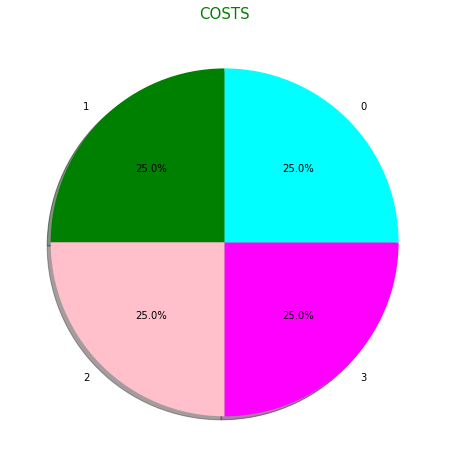

In [9]:
labels = data_train["price_range"].value_counts().index
sizes = data_train["price_range"].value_counts()
colors = ['green','pink','magenta','cyan',"orange","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'green',fontsize = 15)
plt.show()

### Visualize numerical data

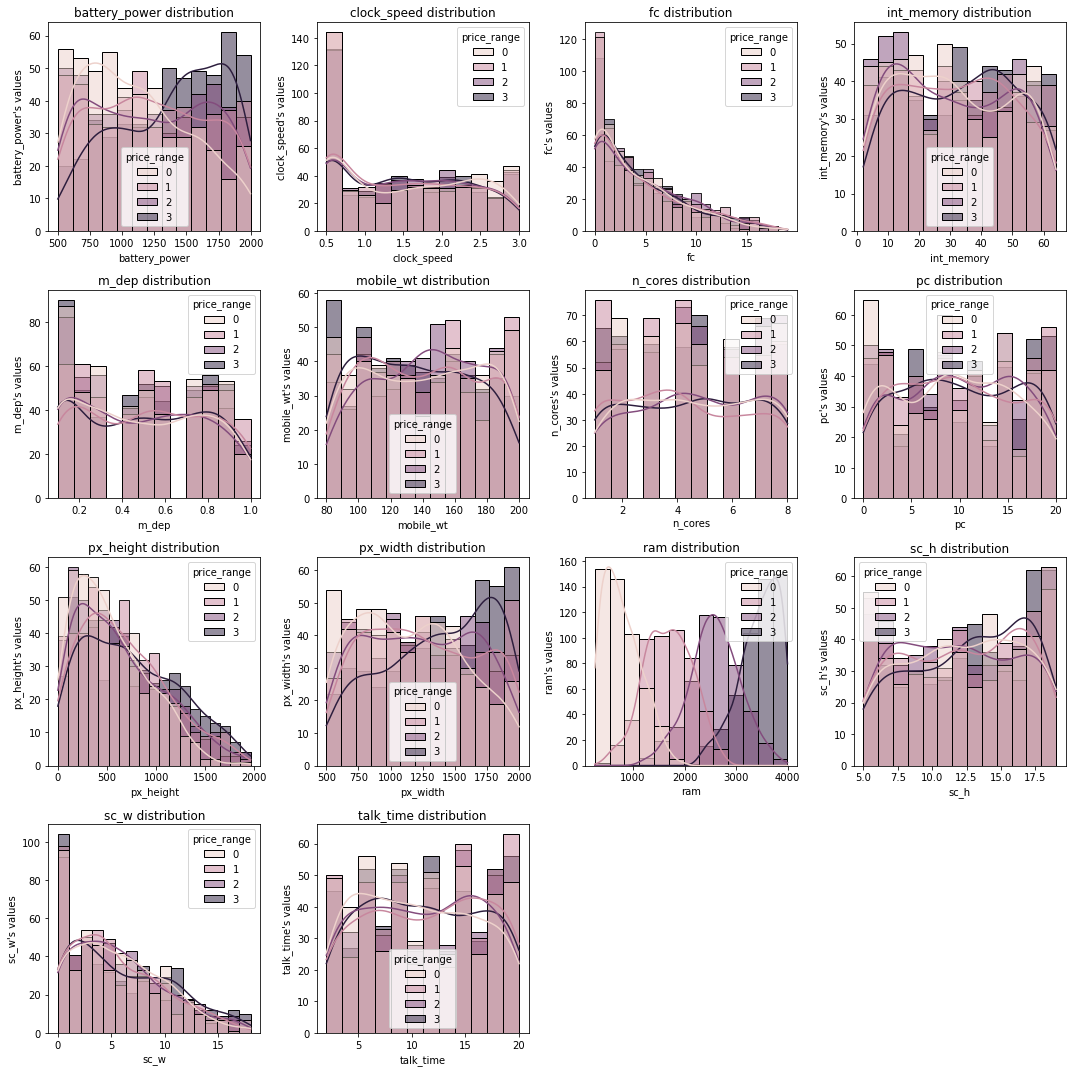

In [12]:
plt.figure(figsize=(15,15))

for index, feature in enumerate(num_feat):
    plt.subplot(4,4,index+1)
    sns.histplot(data=data_train,x=feature, kde=True, color='b', hue="price_range")
    plt.xlabel(feature)
    plt.ylabel(f'{feature}\'s values')
    plt.title(f"{feature} distribution")

plt.tight_layout()

### Visualize categorical data

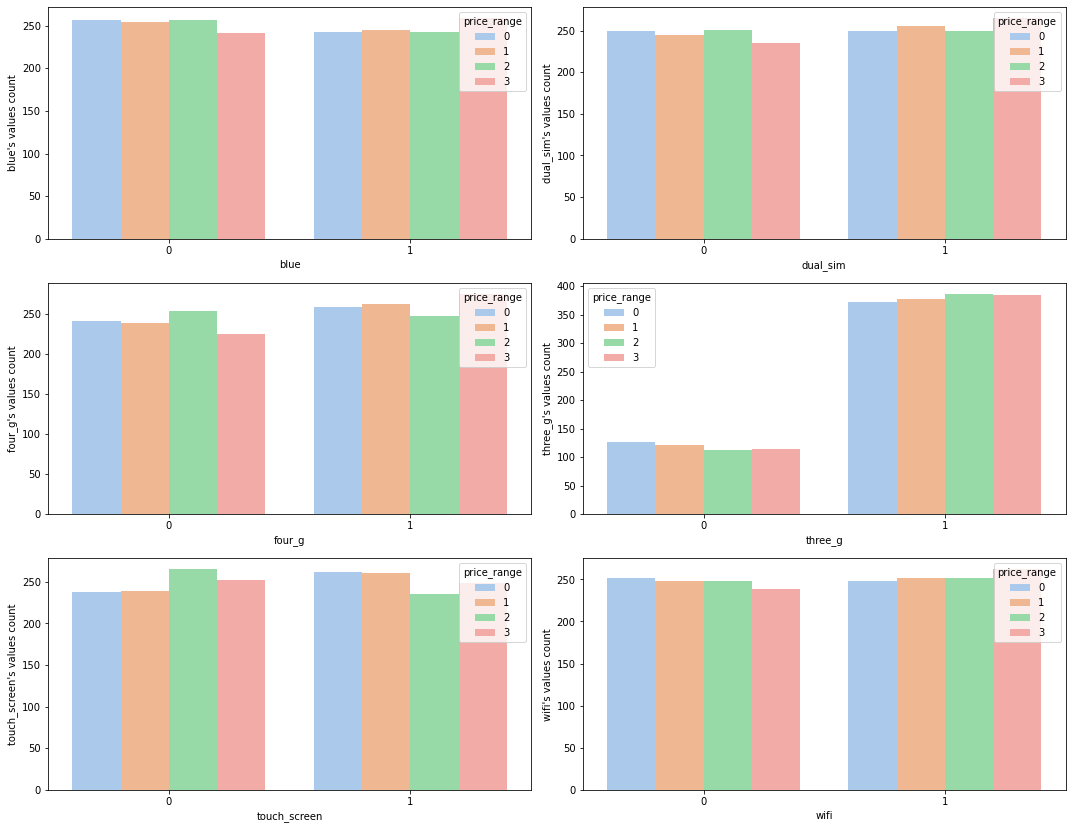

In [18]:
plt.figure(figsize=(15,15))

for index, feature in enumerate(cat_feat):
    if feature != 'price_range':
        plt.subplot(4,2,index+1)
        sns.countplot(x=feature, hue='price_range',data=data_train,palette='pastel')
        plt.xlabel(feature)
        plt.ylabel(f'{feature}\'s values count')

plt.tight_layout()

### Orrelation between the features

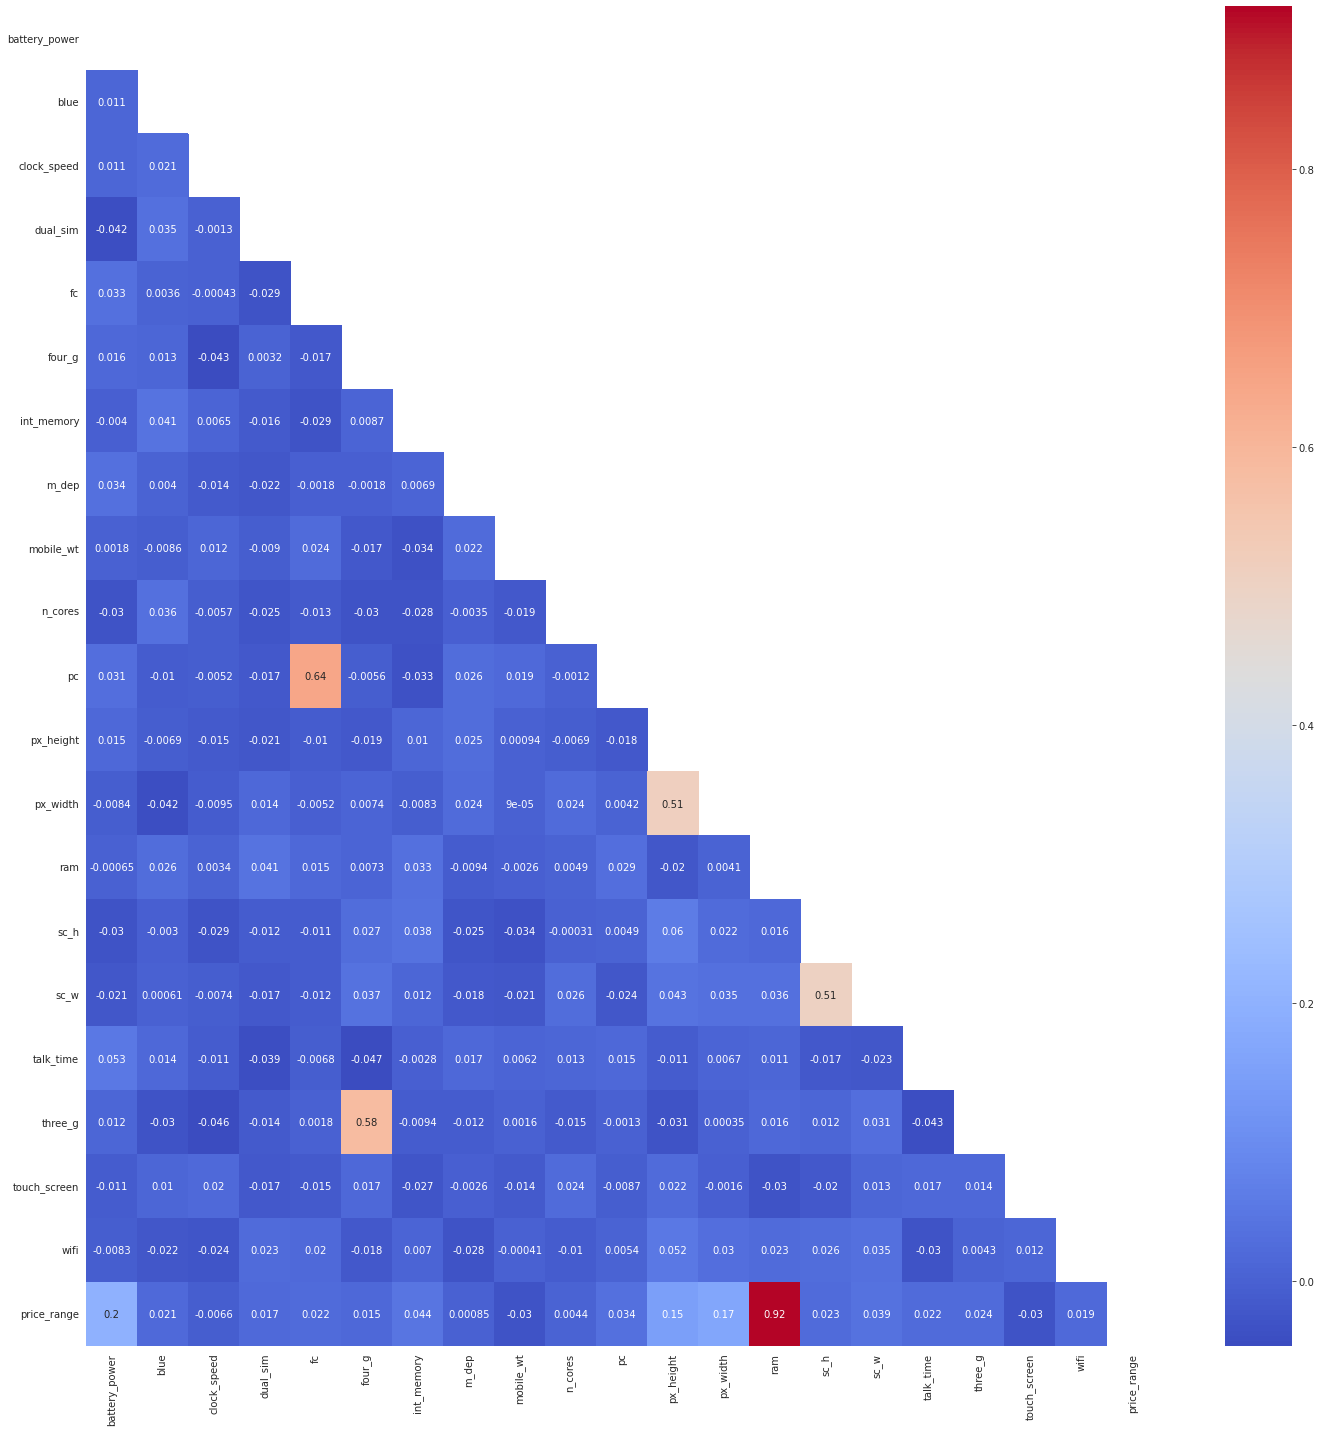

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,20))
corr = data_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
plt.tight_layout()

'battery_power', 'px_height', 'px_width', 'ram' and 'price_range' features have strong effect on price

#### Effect of special features on price

battery_power

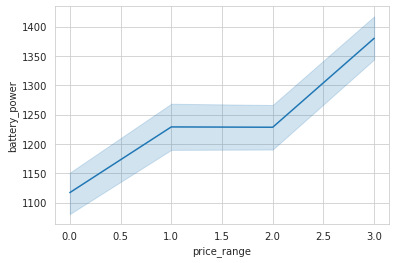

In [32]:
sns.lineplot(y='battery_power',x='price_range',data=data_train)

#### Effect of pair features on price 

px_height

In [28]:
px.box(data_train,x='price_range',y='px_height',
       color='price_range',template='ggplot2',
       labels={'price_range':'Price Range',
               'px_height':'px_height'},
       title=f"Effect of px height on Price")

px_width

In [29]:
px.box(data_train,x='price_range',y='px_width',
       color='price_range',template='ggplot2',
       labels={'price_range':'Price Range',
               'px_width':'px_width'},
       title=f"Effect of px width on Price")

ram

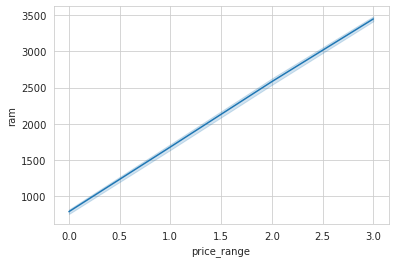

In [33]:
sns.lineplot(y='ram',x='price_range',data=data_train)

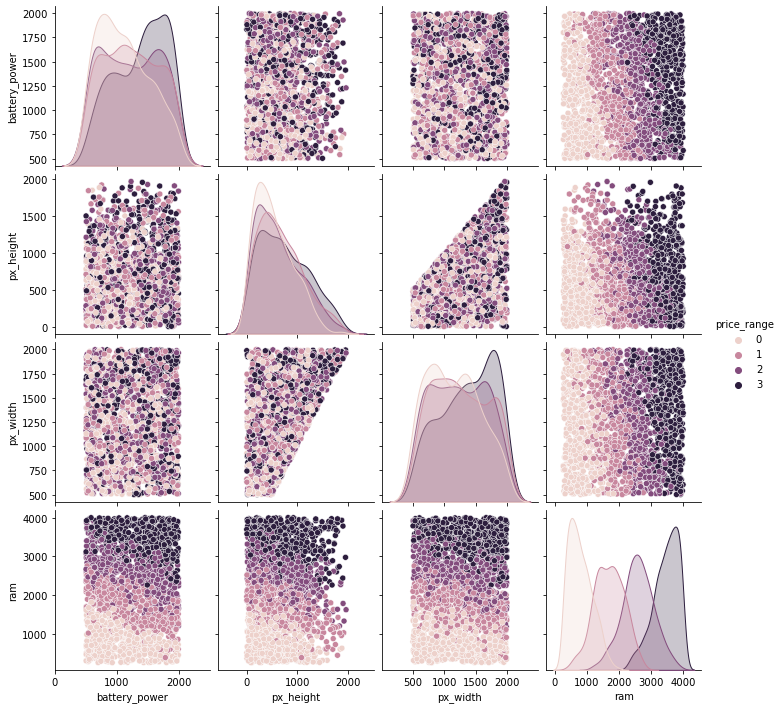

In [10]:
sns.pairplot(data_train[['battery_power', 'px_height', 'px_width', 'ram', 'price_range']], hue= 'price_range')

Có thể thấy tổ hợp các cặp px_width, px_height, battery power thì giá phân tán khá hỗn loạn và ko có quy tắc. Nhưng khi ghép cặp vs ram thì giá phân biệt rất rõ ràng

## Training

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score